# Faulty charts 

<div style="max-width: 60ch">

In this lecture we'll go into faulty line charts and bar charts, that is charts that are deceptive, misleading and/or wrong

- [data source](https://www.kaggle.com/datasets/dmi3kno/newcarsalesnorway)

</div>


In [1]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


## Faulty line chart

<div style="max-width: 60ch">

Never plot line charts when you have categorical variables without natural order. This doesn't make any sense as for example what does it mean to be between Volkswagen and Volvo? Line charts imply continuity and order, which categorical variables such as car brands doesn't have.  

Here a bar chart is more suited.

</div>

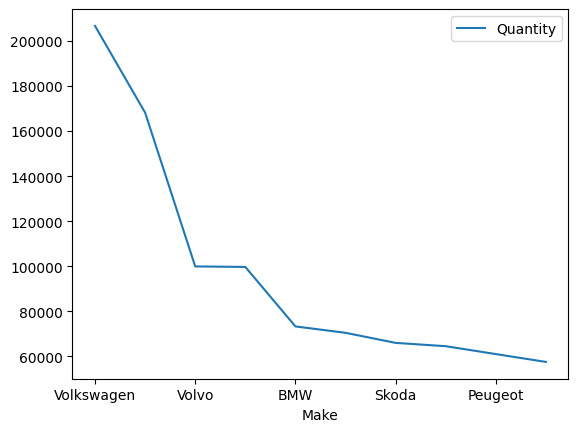

In [4]:
from utils import top_ten_bar, df_quantity_make

df_quantity_make_top_10 = df_quantity_make.iloc[:10]
df_quantity_make_top_10.plot(x = "Make", y = "Quantity");

## Faulty bar chart

<div style="max-width: 60ch">

Bar charts must have zero baseline as the height of each bar visually represents the value. Comparison is distorted without the zero baseline, which can be very deceptive.  

In the example below our eyes are tricked to believe Volkswagen have 3 times more sales than Toyota while in reality it is just 22.9%
</div>

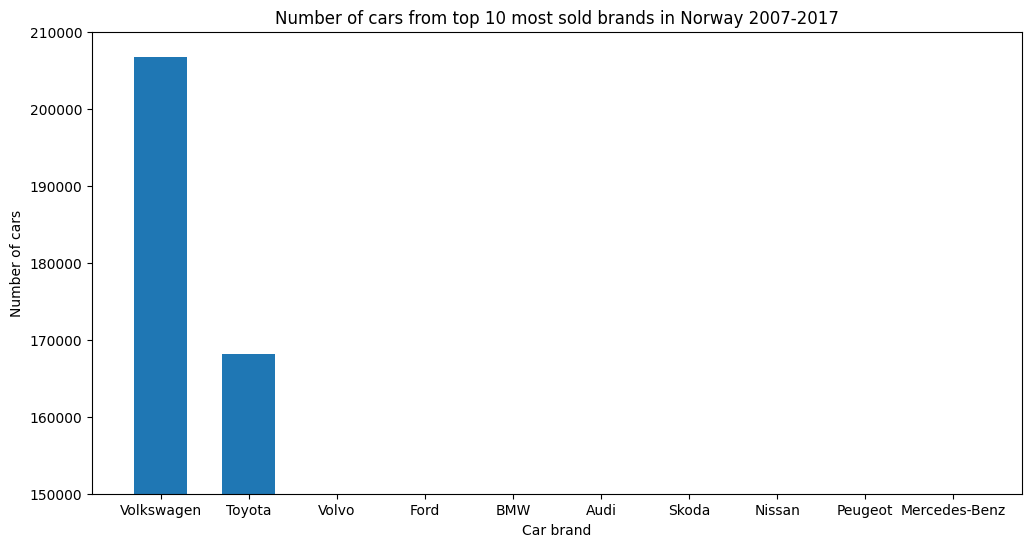

In [5]:
_, ax = top_ten_bar()

ax.set_ylim(150000, 210000);

In [ ]:
volkswagen = df_quantity_make.query("Make == 'Volkswagen'")["Quantity"].values[0]
toyota = df_quantity_make.query("Make == 'Toyota'")["Quantity"].values[0]

factor = volkswagen / toyota
percentage = (factor - 1) * 100

print(f"Volkswagen sold {percentage:.2f}% more than Toyota")

Volkswagen sold 22.89% more than Toyota
